In [1]:
from rec_stream import ReconStream
import numpy as np

import config
import dxchange
import matplotlib.pyplot as plt

%matplotlib inline

spefile module not found
netCDF4 module not found
EdfFile module not found
astropy module not found
olefile module not found


In [2]:

# init parameters with default values. can be done ones
config.write_args('test.conf')
# read parameters
args = config.read_args('test.conf')

proj, flat, dark, theta = dxchange.read_aps_32id('/home/beams/TOMO/conda/tomocupy/tests/data/test_data.h5')
[nproj,nz,n] = proj.shape

# steraming reconstruction class
cl_recstream = ReconStream(args, nproj, nz, n, theta)

# intermediate arrays with results
res1 = np.empty(cl_recstream.proj_shape,dtype=args.dtype)
res2 = np.empty(cl_recstream.proj_shape_pad,dtype=args.dtype)
res3 = np.empty(cl_recstream.rec_shape,dtype=args.dtype)

# processing and reconstruction
cl_recstream.proc_sino(res1,proj,dark,flat)
cl_recstream.proc_proj(res2,res1)
cl_recstream.rec_sino(res3,res2)

(720, 22, 1536)


'standard'

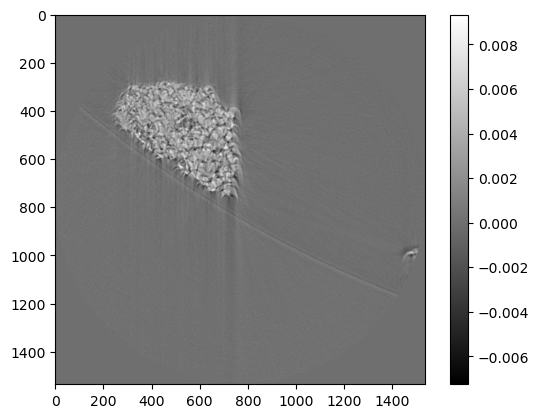

In [3]:
plt.imshow(res3[0],cmap='gray')
plt.colorbar()